In [1]:
import pickle
import psycopg2
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
db = psycopg2.connect(dbname='airpy', user='airpy')

In [24]:
df = pd.read_sql("""
WITH
cid AS (SELECT scientific.selectChannels(_networkkey:='{RTU}', _measurandkey:='{CO2}', _sitekey:='{41R012}'))
SELECT TimeValue, UserFloatValue
FROM datastore.source, cid
WHERE channelid=ANY(cid.selectchannels)
AND qualitycodeid=6 AND granulityid=1 AND TimeValue>='2000-01-01'
ORDER BY TimeValue"""
, db)

In [25]:
df.head()

,timevalue,userfloatvalue
0,2000-01-01 00:00:00,402.0
1,2000-01-01 00:30:00,404.0
2,2000-01-01 01:00:00,406.0
3,2000-01-01 01:30:00,409.0
4,2000-01-01 02:00:00,404.0


In [26]:
df = df.set_index('timevalue').resample('30T').fillna(None).interpolate()

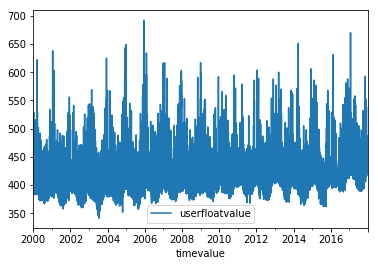

In [27]:
df.plot()

In [28]:
rate = 1/(30*60)

In [29]:
f, P = signal.periodogram(df['userfloatvalue'], rate, detrend='linear')

In [30]:
fd = (60*60*24)*f

In [40]:
peaks = signal.find_peaks(P, distance=5000, threshold=1e6)
#peaks

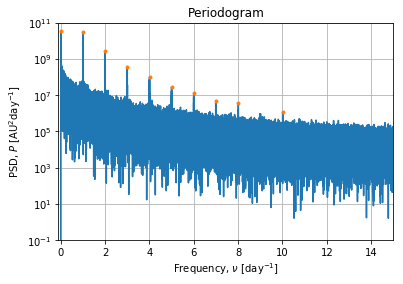

In [41]:
fig, axe = plt.subplots()
axe.semilogy(fd, P)
axe.plot(fd[peaks[0]], P[peaks[0]], '.')
#axe.set_xlim([0,1.1e-4])
axe.set_xlim([-0.1,15])
axe.set_ylim([1e-1, 1e11])
#axe.set_xlabel(r'Frequency, $\nu$ $[\mathrm{Hz}]$')
axe.set_xlabel(r'Frequency, $\nu$ $[\mathrm{day}^{-1}]$')
#axe.set_ylabel(r'PSD, $P$ $[\mathrm{AU^2Hz}^{-1}]$')
axe.set_ylabel(r'PSD, $P$ $[\mathrm{AU^2day}^{-1}]$')
axe.set_title('Periodogram')
axe.grid(which='both')

In [42]:
fp = f[peaks[0]]
1/fp/(60*60*24)

array([3.65277778e+02, 1.00000000e+00, 5.00000000e-01, 3.33333333e-01,
       2.49658262e-01, 2.00000000e-01, 1.66514714e-01, 1.42689729e-01,
       1.24829131e-01, 9.98906141e-02])